In [8]:
from TextClass.ClassifierCv import ClassifierCv
import pandas as pd

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

## Imbalanced classification

Many times equal number of examples in classes is not possible. For that methods to deal with imbalanced data could be used. Methods are from package https://github.com/scikit-learn-contrib/imbalanced-learn. This is just example tutorial. Imblearn methods could not be used with FastText as this model takes only textual input not array/matrix.

#### data

In [2]:
text=['i am happy', 'i very friendly','you are happy', 'you are friendly','we are friendly', 'you are bad',
      'i am bad','i am unhappy','you are unhappy']
category=['pos','pos','pos','pos','pos','neg','neg','neg','neg']
data=pd.DataFrame({"text":text, "category":category})

#### initialize model object

In [3]:
cf_cv=ClassifierCv(data['category'],data['text'])

#### gridsearch

In [9]:
cf_cv.prepare_pipeline( [('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                            ('rand_samp',SMOTE(random_state=0)),#imblearn method
                          ('crf', MultinomialNB()) ])

param_dist = {'crf__alpha':[0.01, 0.02, 0.05, 0.07, 0.09]}

cf_cv.perform_random_search(param_dist)
cf_cv.print_top_random_search(3)

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.01}

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.02}

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.05}

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.07}

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.09}



#### train model

MEDIAN
0    0.479167
dtype: float64
MEAN
0    0.479167
dtype: float64


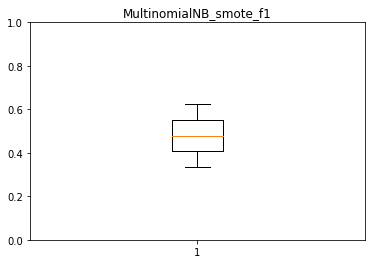

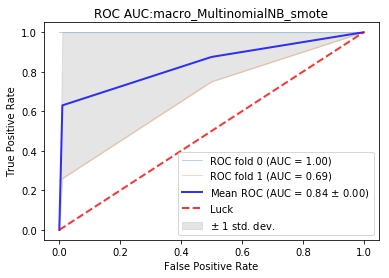

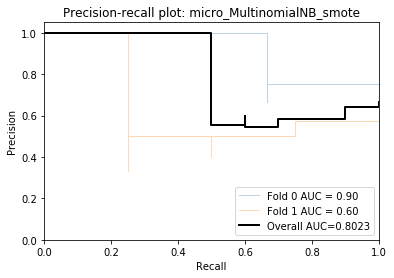

In [10]:
cf_cv.train_save_metrics([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                           ('rand_samp',SMOTE(random_state=0)),#imblearn methors are before model
                          ('clf', MultinomialNB(alpha=.01)),], 
                         'f1', 
                         'MultinomialNB_smote',
                        num_cv=2)